<a href="https://colab.research.google.com/github/goldentrader/Wine-quality/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

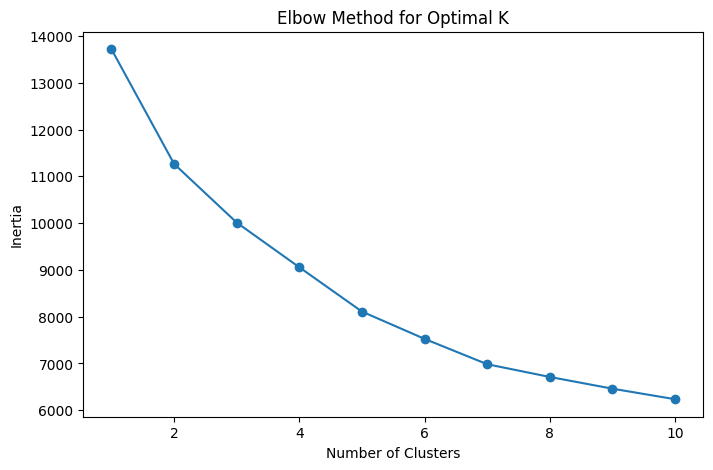

Silhouette Score for K=3: 0.17608280450900873


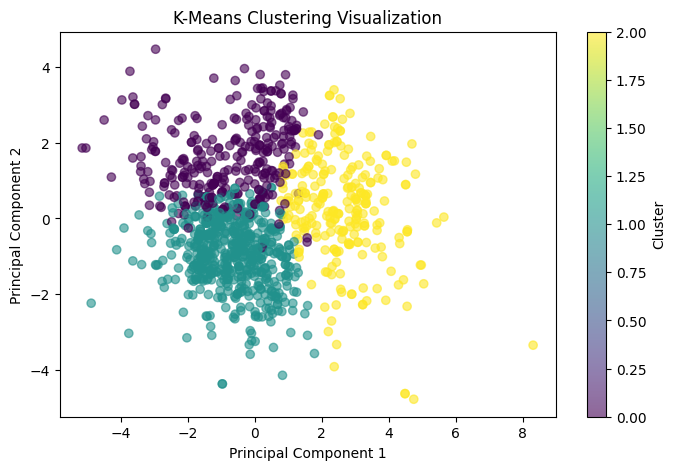

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = "WineQT.csv"  # Ensure the file is uploaded in Colab

df = pd.read_csv(file_path)

# Drop irrelevant columns
df_kmeans = df.drop(columns=['Id'])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal K (e.g., 3 based on the elbow method)
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_final.fit(df_scaled)
labels = kmeans_final.labels_

# Add cluster labels to the dataset
df['Cluster'] = labels

# Compute silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Score for K={k_optimal}: {silhouette_avg}')

# Visualize clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-2-08763b357383>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_itemsets_sorted['support'], y=frequent_itemsets_sorted['itemsets'], palette="viridis")


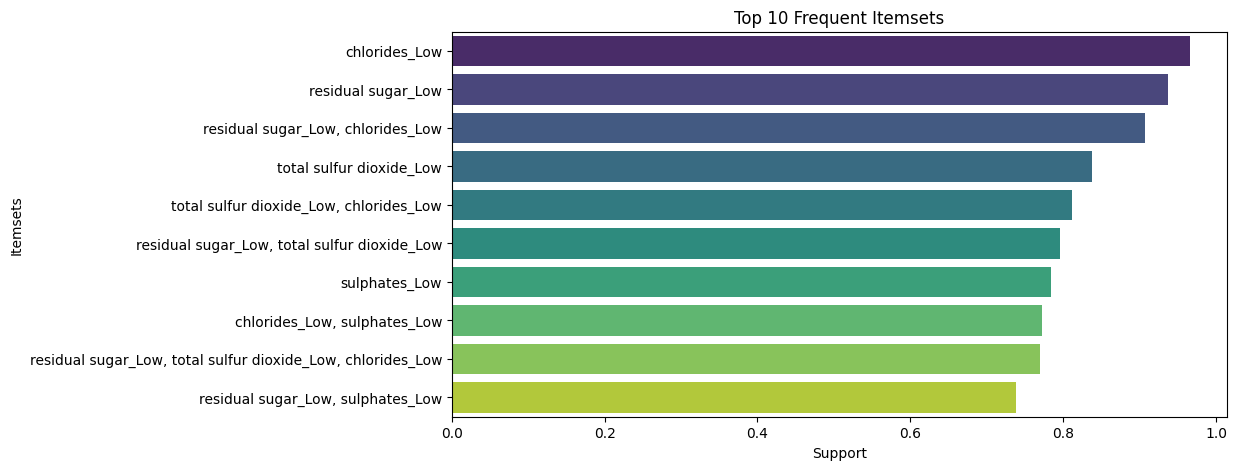

<ipython-input-2-08763b357383>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rules_sorted['lift'], y=rules_sorted['rule'], palette="coolwarm")


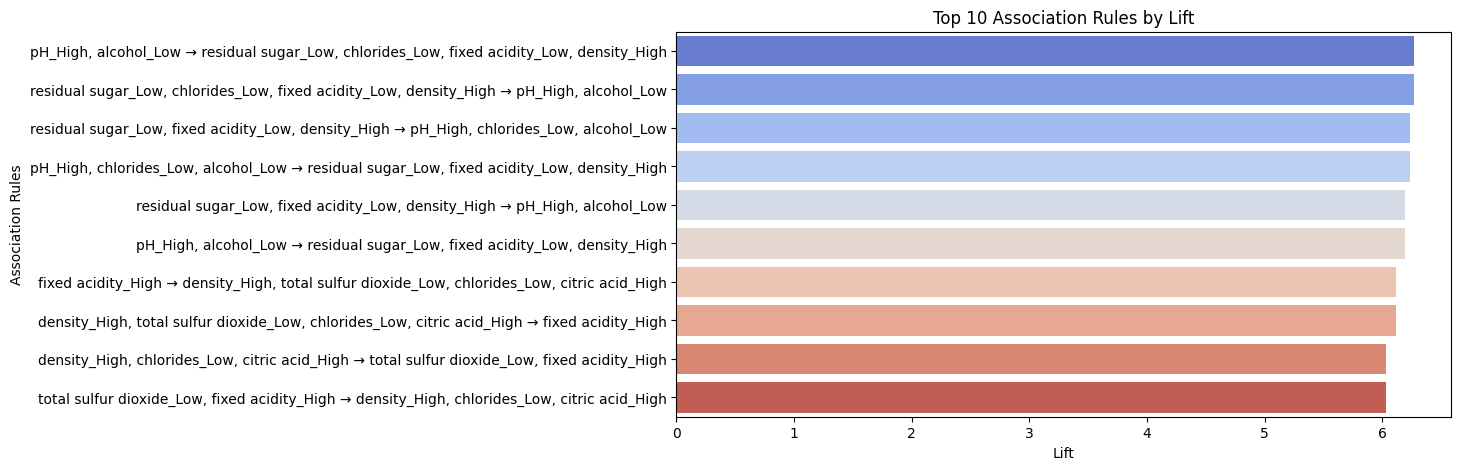

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "WineQT.csv"  # Ensure the file is uploaded in Colab
df = pd.read_csv(file_path)

# Drop irrelevant columns
df_apriori = df.drop(columns=['Id'])

# Convert numerical features into categorical values using binning
for column in df_apriori.columns:
    if df_apriori[column].dtype != 'object':  # Apply only to numerical columns
        unique_values = df_apriori[column].nunique()
        bins = max(2, min(unique_values, 4))  # Ensure at least 2 bins
        labels = ["Low", "Medium", "High", "Very High"][:bins]  # Match labels to bins correctly
        df_apriori[column] = pd.cut(df_apriori[column], bins=bins, labels=labels, include_lowest=True)

# Convert the DataFrame into a transaction format
transactions = pd.get_dummies(df_apriori)

# Apply the Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Convert itemsets to string format
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Visualization of frequent itemsets (limit to top 10 for clarity)
if not frequent_itemsets.empty:
    frequent_itemsets_sorted = frequent_itemsets.sort_values(by="support", ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=frequent_itemsets_sorted['support'], y=frequent_itemsets_sorted['itemsets'], palette="viridis")
    plt.xlabel("Support")
    plt.ylabel("Itemsets")
    plt.title("Top 10 Frequent Itemsets")
    plt.show()

# Visualization of top association rules (limit to top 10)
if not rules.empty:
    rules_sorted = rules.sort_values(by="lift", ascending=False).head(10)
    rules_sorted['rule'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

    plt.figure(figsize=(10, 5))
    sns.barplot(x=rules_sorted['lift'], y=rules_sorted['rule'], palette="coolwarm")
    plt.xlabel("Lift")
    plt.ylabel("Association Rules")
    plt.title("Top 10 Association Rules by Lift")
    plt.show()


Accuracy: 0.5633187772925764
Confusion Matrix:
 [[ 0  4  2  0  0]
 [ 2 66 28  0  0]
 [ 1 34 55  9  0]
 [ 0  2 16  8  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.62      0.69      0.65        96
           6       0.53      0.56      0.54        99
           7       0.47      0.31      0.37        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.33      0.31      0.31       229
weighted avg       0.55      0.56      0.55       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


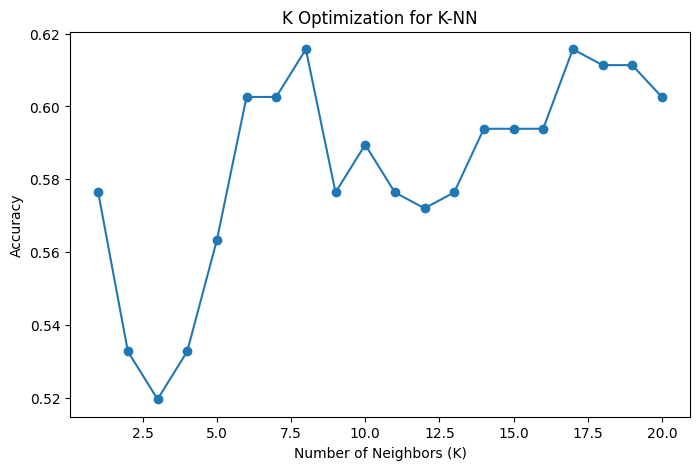

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = "WineQT.csv"  # Ensure the file is uploaded in Colab
df = pd.read_csv(file_path)

# Drop irrelevant columns
df_knn = df.drop(columns=['Id'])

# Define features and target
X = df_knn.drop(columns=['quality'])  # Features
y = df_knn['quality']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply K-NN classifier
k = 5  # Default K value, can be optimized
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optimize K by testing different values
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K Optimization for K-NN')
plt.show()